# Welcome to my LSTM Model! Hit run and watch the step-by-step training of my stock prediction Model

At the end you will get a LSTM_model file which can be plugged into a different script @/stockpredictionapp.ipynb which can be applied to all stocks and not just the 9 tested here!

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the tickers to fetch data for
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'NVDA', 'ADBE', 'INTC', 'CSCO', 'IBM']

# Fetch data for each ticker using Yahoo Finance API
data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(period='5y')['Close']

# Combine data for all stocks into a single dataset
df = pd.concat(data.values(), axis=1, keys=data.keys())

df

# This data will now be shaped so it can be inputted into the machine learning model!

Using MinMaxScaler we are able to normalize our dataframe into managble variables which can be inputted into the model

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,10))
scaled_data = scaler.fit_transform(df)

# split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]


# Creating Datasets

What is lookback?

    It is the value of N past time steps which the dataset will input into the neural network to predict the next value of the time-series.
    
This code will take that value and create datasets for testing and training the prediction values and the model.
    
    

In [ ]:
# create input/output arrays for training and testing data
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

lookback = 60
x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)


# Time to build the model!
1. creating the models
2. compliing the model
3. fitting the data into the model

In [ ]:

# Build Model
model = Sequential() 
model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Heres what our model looks like so far!

In [ ]:
print(model.summary())

# Now that the model is created, we can start to make our predictions!


In [ ]:
# pickle data
model.save("lstm_model_l1")

# Below are two graphs which outline the trends in the dataset

first graph - shows the different stock price changes over the past 5 years

second graph - shows the correlation matrix of the data which can be used to notice stock movement in correlation with other stocks. This can give users extra information for making safe investments! 

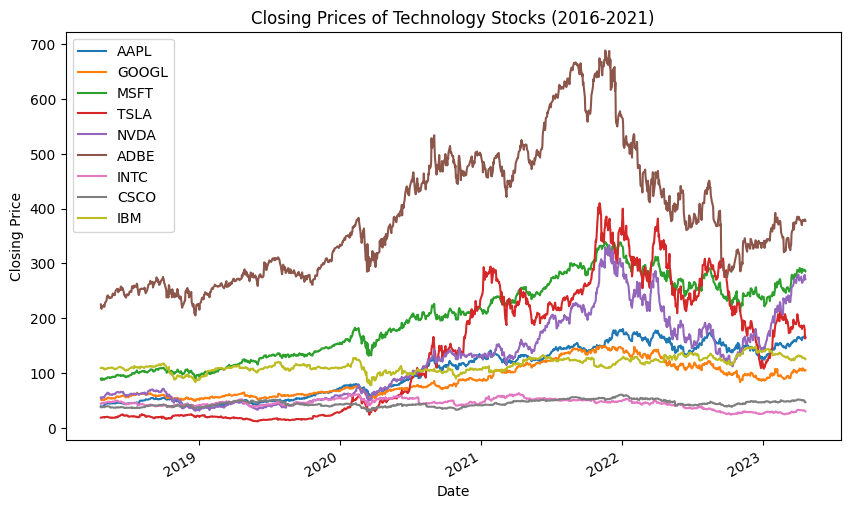

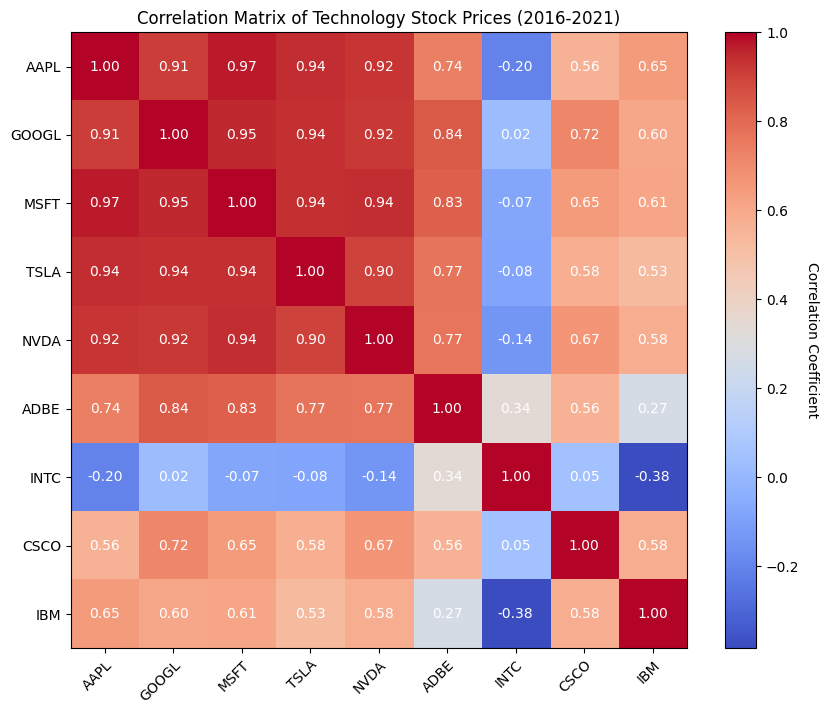

In [14]:
# Plot the closing prices of each stock over time
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Technology Stocks (2016-2021)')
plt.show()

# Compute the correlation matrix between stock prices
corr_matrix = df.corr()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(corr_matrix, cmap=cmap)
ax.set_xticks(np.arange(len(tickers)))
ax.set_yticks(np.arange(len(tickers)))
ax.set_xticklabels(tickers)
ax.set_yticklabels(tickers)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
         rotation_mode='anchor')
for i in range(len(tickers)):
    for j in range(len(tickers)):
        text = ax.text(j, i, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                       ha='center', va='center', color='w')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation Coefficient', rotation=-90, va='bottom')
plt.title('Correlation Matrix of Technology Stock Prices (2016-2021)')
plt.show()
